In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [4]:
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# store original dataframe
df_orig = df[:]

In [6]:
df.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.50,1.50,NaN,107000.00,20000.00,10000.00,NaN,NaN,7392,807.00,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.00,3.00,NaN,0.00,0.00,0.00,NaN,NaN,7419,807.00,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [7]:
dt_type = []
str_type = []
for i in df_orig['timestamp']:
    if not isinstance(i,(str)):
        print(i, type(i))
        dt_type.append(i)
    else:
        str_type.append(i)
print(f" raw 'timestamp' size:       {df_orig['timestamp'].size} ")
print(f" 'timestamp' str count:      {len(str_type)} ")
print(f" 'timestamp' datetime count: {len(dt_type)} ")

 raw 'timestamp' size:       62642 
 'timestamp' str count:      62642 
 'timestamp' datetime count: 0 


In [8]:
# convert 'timestamp' to_datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M:%S')

In [9]:
df['year'] = df['timestamp'].dt.year
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,...,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.50,1.50,NaN,107000.00,20000.00,10000.00,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.00,3.00,NaN,0.00,0.00,0.00,NaN,NaN,...,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.00,0.00,NaN,155000.00,0.00,0.00,NaN,NaN,...,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.00,5.00,NaN,157000.00,180000.00,35000.00,NaN,NaN,...,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.00,3.00,NaN,0.00,0.00,0.00,NaN,NaN,...,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.00,1.00,Distributed Systems (Back-End),155000.00,150000.00,22000.00,NaN,NaN,...,1973,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018
62638,2018-09-13 08:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.00,2.00,Full Stack,146900.00,73200.00,16000.00,NaN,NaN,...,2037,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018
62639,2018-09-13 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.00,12.00,Full Stack,157000.00,25000.00,20000.00,NaN,NaN,...,2044,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018
62640,2018-09-16 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.00,4.00,iOS,194688.00,57000.00,29000.00,NaN,NaN,...,2097,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018


In [10]:
# rename and rearange columns (personal preference)
rename_col = {       
   'totalyearlycompensation' : 'total_yearly_compensation',
   'yearsofexperience' : 'years_of_experience',
   'yearsatcompany' : 'years_at_company',
   'basesalary' : 'base_salary',
   'stockgrantvalue' : 'stock_grant_value',
   'otherdetails' : 'other_details',
   'cityid' : 'city_id',
   'dmaid' : 'dma_id',
   'rowNumber' : 'row_number',
}
df=df.rename(columns=rename_col)
df = df[['timestamp','year','company','level','title','location','years_of_experience','years_at_company','tag','gender','other_details','city_id','dma_id','row_number','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic','Race','Education','stock_grant_value','bonus','base_salary','total_yearly_compensation',]]


In [11]:
# cheking for nulls
for c in df.columns:
    if df[c].isnull().sum() != 0:
        print(f"{df[c].isnull().sum()} nulls in column {c}")
# df.isnull().sum()

5 nulls in column company
123 nulls in column level
870 nulls in column tag
19540 nulls in column gender
22508 nulls in column other_details
2 nulls in column dma_id
40215 nulls in column Race
32272 nulls in column Education


In [12]:
# get all columns w/all nans, if exists
nan_cols = [i for i in df.columns if df[i].isnull().all()]
nan_cols

[]

In [13]:
# get all rows w/all nans, if exists
df[df.isna().all(axis=1)]

,timestamp,year,company,level,title,location,years_of_experience,years_at_company,tag,gender,other_details,city_id,dma_id,row_number,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,stock_grant_value,bonus,base_salary,total_yearly_compensation


In [14]:
# checking for duplicate 
df.duplicated().sum()

0

In [15]:
# # print nr of unique values per column
# for c in df.columns:
#     print(c, df[c].nunique())

In [16]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols=[], corr_method='pearson', title=None, mirrored=False):
    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')
    
    for c in df_temp.columns:
        if df_temp[c].dtype == 'object':
            df_temp = df_temp.drop(c,axis=1)
            print(f'skipping columns [{c}] of object type')

    corr = df_temp.corr(method=corr_method)

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    if mirrored == False:
        sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
    else:
        sns.heatmap(corr, annot=True, cmap=cmap)

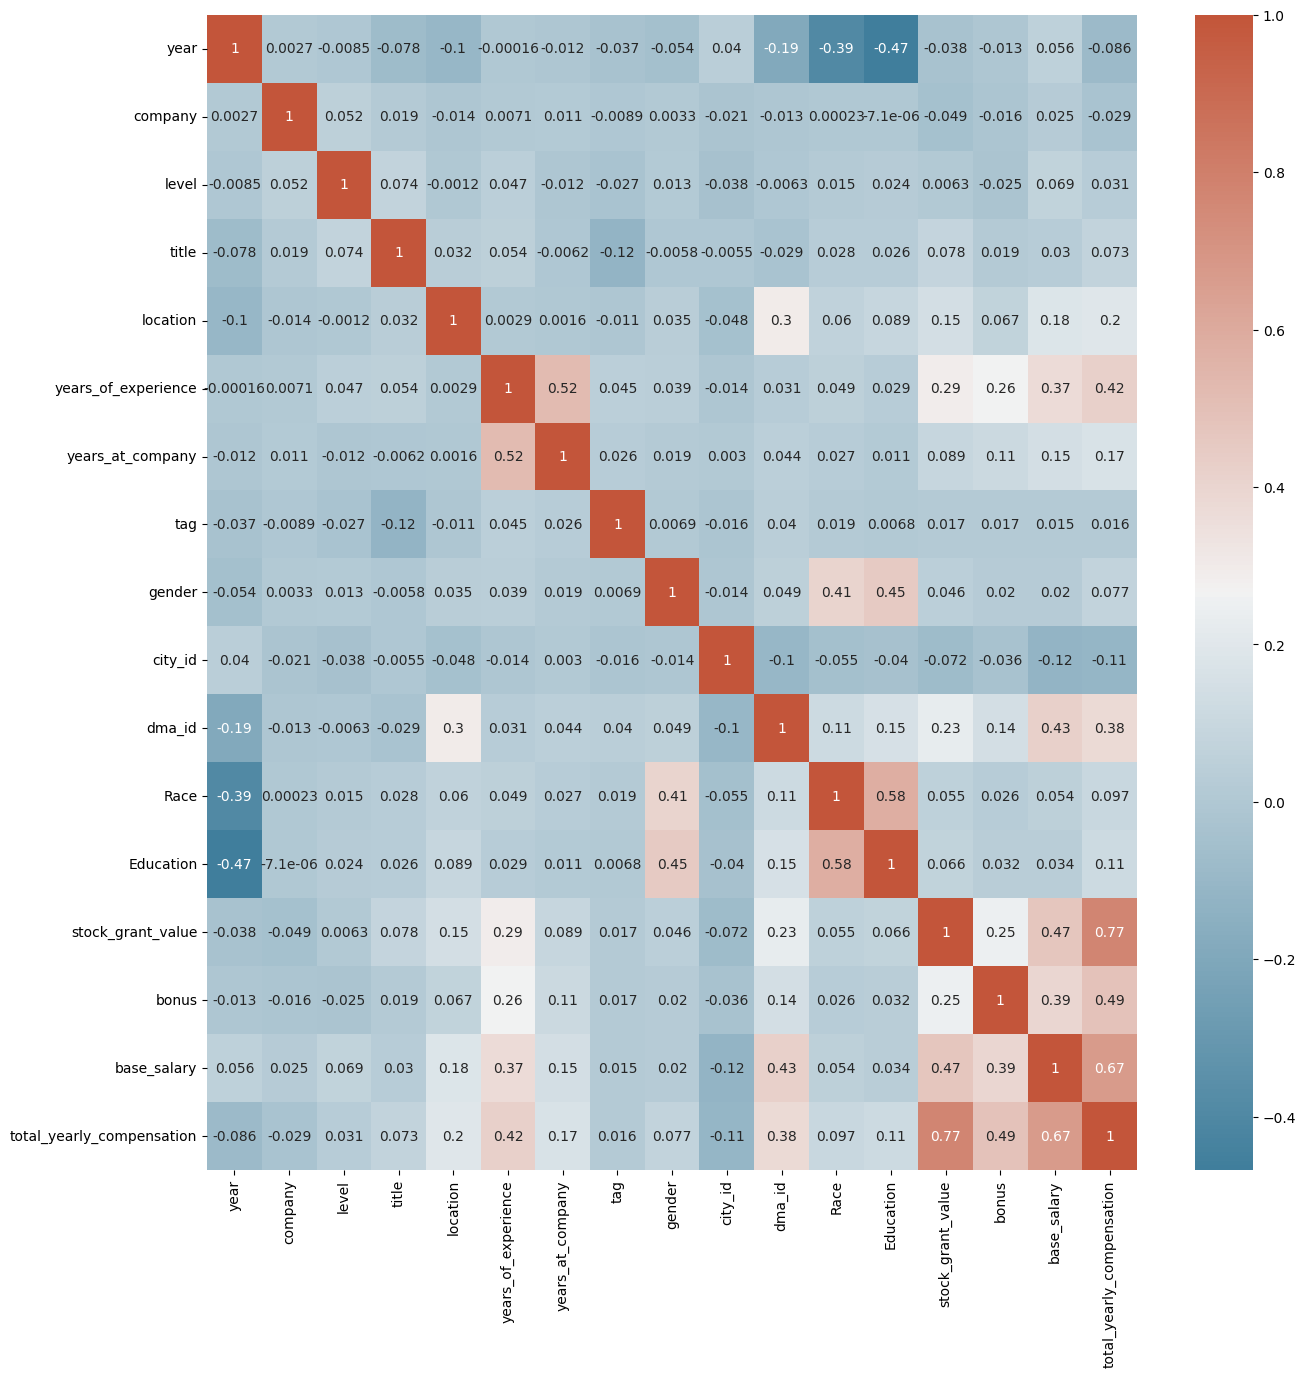

In [17]:
# plotting heat map with labeled values, go get an vague ideea on what I could work on
labeled_df = df[:]
label = LabelEncoder()

# encode all 'object' columns
cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode

for c in cols_to_encode:
    label.fit(labeled_df[c].drop_duplicates())
    labeled_df[c] = label.transform(labeled_df[c])

# exclude some columns
# other_details contains race and Academic Level, exlude that bu keep 'Race' 'Education', same for 'race' and 'education' related columns
rm_cols = [
    'other_details','row_number','timestamp','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic',
    ]
get_heat_map_corr(labeled_df, remove_cols=rm_cols,figsize=(15,15), mirrored=True)
# df_orig['otherdetails'].value_counts()
# df

In [18]:
# replace nans with 'unk' for string columns and mean() for numeric col
fill_na = {
    'company' :         'unk',
    'level' :           'unk',
    'tag' :             'unk',
    'gender' :          'unk',
    'other_details' :   'unk',
    'dma_id' :          df['dma_id'].mean(),
    'Race' :            'unk',
    'Education' :       'unk',
}

# replace nan with respective value from fill_na dict
for k,v in fill_na.items():
    # print(df[k].fillna(k,inplace=True))
    # print(k, v)
    df[k].fillna(v,inplace=True)

# c='dma_id'
# print(f"na sum {df[c].isna().sum()} \n")
# print(df[c].value_counts())
# print(df[c].mean())

# 5 nulls in column company
# 123 nulls in column level
# 870 nulls in column tag
# 19540 nulls in column gender
# 22508 nulls in column other_details
# 2 nulls in column dma_id
# 40215 nulls in column Race
# 32272 nulls in column Education

In [19]:
df['dma_id'].value_counts()
df['dma_id'].dtype

dtype('float64')

In [20]:
# # looking into 'dma_id', values mostly float but dtype == 'O', nevermind I filled na wrong value ))
# types = []
# for i in df['dma_id']:
#     # print(i, type(i), type(i) == 'float')
#     # print(isinstance(i, (int, float)))
#     if isinstance(i, (int, float)) == False:
#         types.append(i)

# for i in set(types):
#     print(i)
#     df['dma_id'] = df['dma_id'].replace(i, "unk")

In [21]:
df['timestamp'].dtypes
df.dtypes

timestamp                    datetime64[ns]
year                                  int32
company                              object
level                                object
title                                object
location                             object
years_of_experience                 float64
years_at_company                    float64
tag                                  object
gender                               object
other_details                        object
city_id                               int64
dma_id                              float64
row_number                            int64
Masters_Degree                        int64
Bachelors_Degree                      int64
Doctorate_Degree                      int64
Highschool                            int64
Some_College                          int64
Race_Asian                            int64
Race_White                            int64
Race_Two_Or_More                      int64
Race_Black                      

In [22]:
# # df[df['company'] == "Apple"]
# # df[df['company'] == "apple"]

# for i in df['company'].drop_duplicates():
#     # replace the lowercase values with 1st capital letter
#     # print(i)
#     if df[df['company'] == i.lower()].size != 0:
#         # print(i)
#         # print(df[df['company'] == i.lower()].size)

#         # print( df[df['company'] == i.lower()]['company'] )
#         df[df['company'] == i.lower()]['company'] = i
#         # break
        
# #         # print(df[df['company'] == i.lower()].size)
# #         # df[df['company'] == "apple"]
# df[df['company'] == "apple"]

In [23]:
# replace columns having same company name E.g.:("apple" with "Apple") 
for i in df['company'].drop_duplicates():
    if df[df['company'] == i.lower()].size != 0:
        # print(i)
        df['company'] = df['company'].astype(str)
        # df['company'] = df['company'].str.lower()
        df['company'] = df['company'].replace(i.lower(), i)


In [24]:
# checking if renamed duplicates ok
df[df['company'] == "apple"].head(3)
df[df['company'] == "microsoft"].head(3)

,timestamp,year,company,level,title,location,years_of_experience,years_at_company,tag,gender,other_details,city_id,dma_id,row_number,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,stock_grant_value,bonus,base_salary,total_yearly_compensation


In [25]:
# label dataset
# map classes expressed as non-numerical features to numbers
label = LabelEncoder()

# columns to encode
# cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode = [
    'company',
    'level',
    'title',
    'location',
    'tag',
    'gender',
    'other_details',
    'Race',
    'Education',
]

# encode columns
for c in cols_to_encode:
    label.fit(df[c].drop_duplicates())
    df[c] = label.transform(df[c])

df.head()

,timestamp,year,company,level,title,location,years_of_experience,years_at_company,tag,gender,other_details,city_id,dma_id,row_number,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,stock_grant_value,bonus,base_salary,total_yearly_compensation
0,2017-06-07 11:33:27,2017,918,1091,8,767,1.50,1.50,3051,4,12813,7392,807.00,1,...,0,0,0,0,0,0,0,0,5,5,20000.00,10000.00,107000.00,127000
1,2017-06-10 17:11:29,2017,1386,1795,11,822,5.00,3.00,3051,4,12813,7419,807.00,2,...,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.00,100000
2,2017-06-11 14:53:57,2017,62,1175,8,858,8.00,0.00,3051,4,12813,11527,819.00,3,...,0,0,0,0,0,0,0,0,5,5,0.00,0.00,155000.00,310000
3,2017-06-17 00:23:14,2017,93,1294,12,908,7.00,5.00,3051,4,12813,7472,807.00,7,...,0,0,0,0,0,0,0,0,5,5,180000.00,35000.00,157000.00,372000
4,2017-06-20 10:58:51,2017,816,142,11,609,5.00,3.00,3051,4,12813,7322,807.00,9,...,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.00,157000


In [26]:
df.dtypes

timestamp                    datetime64[ns]
year                                  int32
company                               int32
level                                 int32
title                                 int32
location                              int32
years_of_experience                 float64
years_at_company                    float64
tag                                   int32
gender                                int32
other_details                         int32
city_id                               int64
dma_id                              float64
row_number                            int64
Masters_Degree                        int64
Bachelors_Degree                      int64
Doctorate_Degree                      int64
Highschool                            int64
Some_College                          int64
Race_Asian                            int64
Race_White                            int64
Race_Two_Or_More                      int64
Race_Black                      

In [27]:
def get_correlation(df, target_col, cols, sort=True):
    corr_dict = {}
    for i in cols:
        correlation = target_col.corr(df[i])
        corr_dict[i] = correlation

    if sort:
        corr_dict = dict(sorted(corr_dict.items(), key=lambda x: x[1], reverse=True))
    return corr_dict

In [28]:
# get sorted correlation columns to target col
cols = [i for i in df.columns]
cols.remove('timestamp')
cols.remove('total_yearly_compensation')
df.dtypes
# corr_dir = get_correlation(df,df['total_yearly_compensation'], cols)
# corr_dir

timestamp                    datetime64[ns]
year                                  int32
company                               int32
level                                 int32
title                                 int32
location                              int32
years_of_experience                 float64
years_at_company                    float64
tag                                   int32
gender                                int32
other_details                         int32
city_id                               int64
dma_id                              float64
row_number                            int64
Masters_Degree                        int64
Bachelors_Degree                      int64
Doctorate_Degree                      int64
Highschool                            int64
Some_College                          int64
Race_Asian                            int64
Race_White                            int64
Race_Two_Or_More                      int64
Race_Black                      

In [29]:
# sorted correlation of 'total_yearly_compensation', excluded all the salary related columns
cols = [i for i in df.columns]
rm_cols = [
    'bonus',
    'total_yearly_compensation',
    'stock_grant_value',
    'base_salary',
    'timestamp',
]
cols = [r for r in cols if r not in rm_cols]

corr_dir = get_correlation(df,df['total_yearly_compensation'], cols)
corr_dir
# df

{'years_of_experience': 0.4228791379682701,
 'dma_id': 0.37633960908198205,
 'location': 0.19656852722005402,
 'years_at_company': 0.16580220772142953,
 'Education': 0.11405016237745146,
 'Race': 0.09723353624399521,
 'Doctorate_Degree': 0.09717911358987212,
 'gender': 0.07679334989371757,
 'title': 0.07324359734998802,
 'other_details': 0.04942981648672307,
 'level': 0.030671331807024436,
 'Masters_Degree': 0.018319716268971567,
 'tag': 0.015511339922038169,
 'Some_College': -0.003379630401364154,
 'Race_Two_Or_More': -0.009622622236016115,
 'Highschool': -0.014830964931807472,
 'Race_Hispanic': -0.026144721866625278,
 'Race_Black': -0.026741264068291845,
 'Race_White': -0.02780248917286327,
 'company': -0.028613375402636577,
 'Race_Asian': -0.08007181791801464,
 'year': -0.08562346762303057,
 'row_number': -0.09262203762000949,
 'city_id': -0.11020422833628184,
 'Bachelors_Degree': -0.13986633693732867}

In [30]:
# sorted correlation of 'bonus', excluded all the salary related columns
cols = [i for i in df.columns]
rm_cols = [
    'bonus',
    'total_yearly_compensation',
    'stock_grant_value',
    'base_salary',
    'timestamp',
]
cols = [r for r in cols if r not in rm_cols]

corr_dir = get_correlation(df,df['bonus'], cols)
corr_dir

{'years_of_experience': 0.2610514812794633,
 'dma_id': 0.14350500578695552,
 'years_at_company': 0.10812235486112219,
 'Doctorate_Degree': 0.07184381512182492,
 'location': 0.06680147257152017,
 'Education': 0.03193006235967369,
 'Masters_Degree': 0.031537603505810426,
 'Race': 0.026478156145455883,
 'gender': 0.019931804376479966,
 'title': 0.01874019130019586,
 'tag': 0.016990426396797386,
 'Race_Two_Or_More': 0.0017733086284640114,
 'Some_College': -0.0018726964513551324,
 'Race_Black': -0.0040261832341926,
 'Highschool': -0.006915828419945071,
 'Race_Hispanic': -0.006983487312522076,
 'Race_White': -0.00779778871876596,
 'year': -0.012758141971520831,
 'row_number': -0.01475335053657983,
 'other_details': -0.015433353672857511,
 'company': -0.016179532876659037,
 'Race_Asian': -0.022997274357129335,
 'level': -0.02538427992881537,
 'city_id': -0.036118719140196674,
 'Bachelors_Degree': -0.06288079801342321}

In [41]:
cols = [i for i in df.columns]
rm_cols = [
    'years_at_company',
    'timestamp',
]
cols = [r for r in cols if r not in rm_cols]

df.dtypes
corr_dir = get_correlation(df,df['years_at_company'], cols)
corr_dir

{'years_of_experience': 0.5226110925309126,
 'total_yearly_compensation': 0.1658022077214295,
 'base_salary': 0.1455959930500969,
 'bonus': 0.10812235486112218,
 'stock_grant_value': 0.08949233055576696,
 'Race_White': 0.04726719917624662,
 'dma_id': 0.043945965417772806,
 'other_details': 0.04263192450605186,
 'Race': 0.027052445177642843,
 'Masters_Degree': 0.02610949335978688,
 'tag': 0.025916042918940816,
 'gender': 0.01888421557997455,
 'Education': 0.011106912589036613,
 'company': 0.007484507580560756,
 'Some_College': 0.005718314784593522,
 'city_id': 0.00298445172063473,
 'location': 0.00155016259104856,
 'Doctorate_Degree': 0.0011651493589293427,
 'Highschool': -0.005946630627645763,
 'title': -0.006152600634184586,
 'Race_Hispanic': -0.007510806397279406,
 'year': -0.01224988846902885,
 'level': -0.01231855585128214,
 'row_number': -0.012850449625703161,
 'Race_Two_Or_More': -0.014926167177485536,
 'Race_Asian': -0.025887890927249833,
 'Bachelors_Degree': -0.0274865631494100

In [32]:
year_group = df.groupby('year')

Text(0.5, 1.0, 'mean total_yearly_compensation by year')

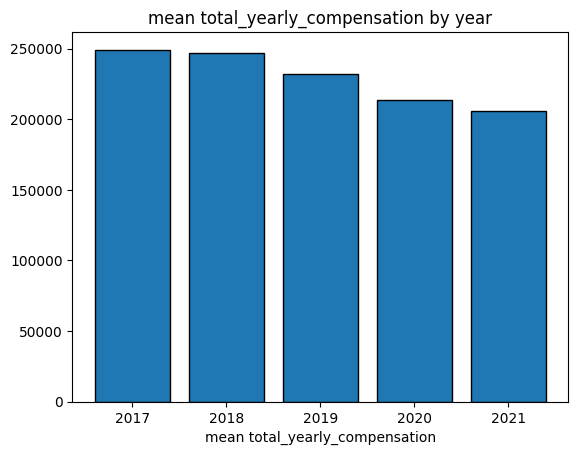

In [33]:
salary_by_year = [year_group.get_group(y)['total_yearly_compensation'].mean() for y in df['year'].value_counts().index]
salary_by_year

# plt.scatter(df['year'].value_counts(), salary_by_year)
plt.bar(df['year'].value_counts().index, salary_by_year, edgecolor='black')
plt.xlabel('year')
plt.xlabel('mean total_yearly_compensation')
plt.title('mean total_yearly_compensation by year')

Text(0.5, 1.0, 'mean bonus by year')

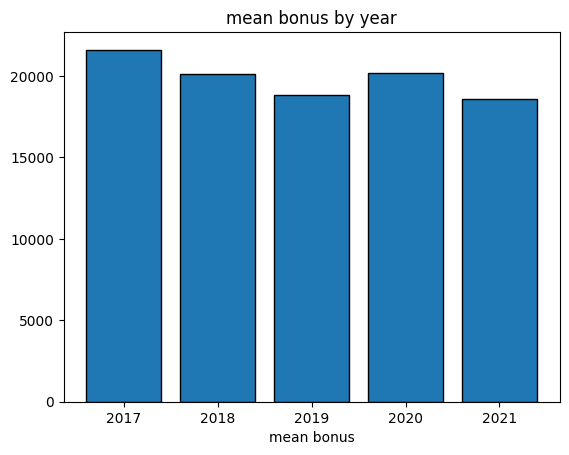

In [34]:
bonus_by_year = [year_group.get_group(y)['bonus'].mean() for y in df['year'].value_counts().index]
plt.bar(df['year'].value_counts().index, bonus_by_year, edgecolor='black')
plt.xlabel('year')
plt.xlabel('mean bonus')
plt.title('mean bonus by year')

Text(0.5, 1.0, 'mean years_at_company by year')

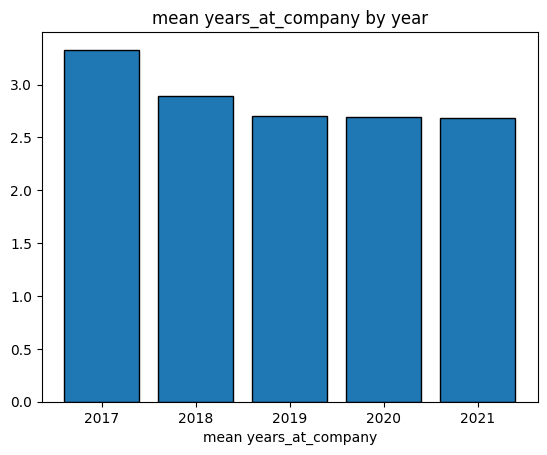

In [35]:
year_at_comp_by_year = [year_group.get_group(y)['years_at_company'].mean() for y in df['year'].value_counts().index]
year_at_comp_by_year

plt.bar(df['year'].value_counts().index, year_at_comp_by_year, edgecolor='black')
plt.xlabel('year')
plt.xlabel('mean years_at_company')
plt.title('mean years_at_company by year')

In [36]:
X = df.drop(['total_yearly_compensation', 'timestamp'],axis=1)
# X
y = df.total_yearly_compensation
# y

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4)

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [38]:
lin_model.score(X_test,y_test)

0.7679018870998982

In [39]:
# get sorted coef_ 
data = {}
for indx, col_name in enumerate(X_train):
    # print(col_name, lin_model.coef_[indx])
    # print(col_name, indx, lin_model.coef_[indx])
    data[col_name] = lin_model.coef_[indx]
data = dict(sorted(data.items(), key=lambda x: x[1],reverse=True))
data

{'Doctorate_Degree': 10389.582003238014,
 'Race_Asian': 7268.032554514686,
 'Race_Two_Or_More': 7146.969462624425,
 'Race_White': 6941.447132277588,
 'Race_Black': 6762.761022339186,
 'gender': 3732.5401287899417,
 'Race_Hispanic': 3137.1317464976973,
 'years_of_experience': 2692.272863554219,
 'title': 299.3951097938916,
 'Race': 81.71941985915939,
 'dma_id': 42.30166242899633,
 'location': 10.899174709231463,
 'level': 1.3937890194184264,
 'bonus': 1.0395846108897042,
 'other_details': 0.9457764359344696,
 'stock_grant_value': 0.9170795543673074,
 'base_salary': 0.576879556610525,
 'row_number': -0.20253597194889908,
 'city_id': -0.3575095679305246,
 'tag': -1.3220083872023045,
 'company': -2.0913901365697605,
 'years_at_company': -221.75523483948896,
 'Education': -1938.0430885203687,
 'Masters_Degree': -3568.0205926160033,
 'year': -4107.108825549777,
 'Some_College': -6835.493058871431,
 'Highschool': -8164.542209021882,
 'Bachelors_Degree': -9394.396069170509}